In [37]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import ast
import nltk
from nltk.corpus import stopwords
# print(stopwords.words('english'))
stop_words = set(stopwords.words('spanish')) 
print(stop_words)

{'estén', 'tendremos', 'todo', 'estos', 'están', 'sean', 'qué', 'nuestros', 'habremos', 'también', 'fueran', 'tuviese', 'serán', 'en', 'habría', 'hubieseis', 'habiendo', 'habrás', 'estado', 'he', 'mi', 'hubieses', 'estaría', 'hubieron', 'serían', 'como', 'está', 'hubiesen', 'habrán', 'ti', 'suyas', 'vuestros', 'tenían', 'del', 'este', 'vuestra', 'algunas', 'fuiste', 'éramos', 'fuimos', 'tuvieran', 'estaréis', 'estáis', 'estabas', 'hayan', 'estuvimos', 'estuviéramos', 'tuyas', 'tenidas', 'has', 'tendríamos', 'habríais', 'seas', 'otro', 'erais', 'tenido', 'suyos', 'fuéramos', 'estarás', 'sentidos', 'sus', 'habrían', 'haya', 'esos', 'serías', 'fuese', 'poco', 'mío', 'esta', 'fueses', 'fueras', 'estando', 'había', 'hubiéramos', 'sería', 'tiene', 'donde', 'habrá', 'tuvieron', 'tengan', 'habrías', 'tienes', 'ellos', 'tuvieseis', 'estas', 'una', 'estoy', 'tengas', 'tendrás', 'habido', 'habríamos', 'tengáis', 'con', 'estaremos', 'teníamos', 'unos', 'hasta', 'que', 'tenida', 'tendrían', 'seríam

In [2]:
data = pd.read_csv('res_fake_attention.csv')

In [3]:
data

,tokens,att_score
0,mujeres,1.018893e+01
1,de,3.119241e+02
2,están,8.813097e+00
3,mostrando,3.781251e-01
4,efectos,7.842436e-01
...,...,...
6515,firma,1.845603e-10
6516,regresado,2.482120e-13
6517,aguantó,4.950492e-22
6518,bonito,9.470084e-27


In [4]:
score = data.att_score

In [6]:
aux = score
aux = aux[1:-1]

In [7]:
aux

1       3.119241e+02
2       8.813097e+00
3       3.781251e-01
4       7.842436e-01
5       4.513725e-01
            ...     
6514    7.419695e-08
6515    1.845603e-10
6516    2.482120e-13
6517    4.950492e-22
6518    9.470084e-27
Name: att_score, Length: 6518, dtype: float64

In [139]:
aux = aux.replace('\n','')
aux

'27.338995 62.31878  39.9609   59.828243 49.686295 52.681274 51.876835 27.996407 56.006973 52.47692  58.382298 67.22114  48.775745 48.30468 60.624702 34.09085  44.78475  56.70589  50.384735 41.994682 42.709614 33.39388  48.47543  36.41835  51.07755  54.774345 49.711372 54.378246 53.702847 50.673046 49.194897 59.52993  53.25212  47.51939  57.20426 57.804943 55.3927   31.395554 49.836708 50.797436 36.578495 58.340466 54.450893 48.68031  53.796047 45.94533  47.522484 45.64319  44.693733 53.29476  48.938477 48.24293  42.959194 51.75307  43.880188 50.180862 53.47129  58.418575 55.28852  51.585827 47.553154 38.455112 51.64935 40.06453  43.2675   47.9369   53.087646 46.09325  13.927591 38.781296 40.737656 45.85831  36.553974 55.76384  61.849922 52.305035 49.2102 54.39308  54.49054  51.32935  59.36625  21.693779 17.248766  6.557031 46.351254 54.270615 19.256565 45.96505  43.06124  38.430412 44.532177 39.62993  56.799274 53.83047  51.74542  48.86015  49.86669  61.752934 50.7511   45.457424 53.2

In [140]:
aux = re.sub('(\s){2,}',' ', aux)

In [141]:
li = list(aux[0:-1].split(' '))

In [142]:
li

['27.338995',
 '62.31878',
 '39.9609',
 '59.828243',
 '49.686295',
 '52.681274',
 '51.876835',
 '27.996407',
 '56.006973',
 '52.47692',
 '58.382298',
 '67.22114',
 '48.775745',
 '48.30468',
 '60.624702',
 '34.09085',
 '44.78475',
 '56.70589',
 '50.384735',
 '41.994682',
 '42.709614',
 '33.39388',
 '48.47543',
 '36.41835',
 '51.07755',
 '54.774345',
 '49.711372',
 '54.378246',
 '53.702847',
 '50.673046',
 '49.194897',
 '59.52993',
 '53.25212',
 '47.51939',
 '57.20426',
 '57.804943',
 '55.3927',
 '31.395554',
 '49.836708',
 '50.797436',
 '36.578495',
 '58.340466',
 '54.450893',
 '48.68031',
 '53.796047',
 '45.94533',
 '47.522484',
 '45.64319',
 '44.693733',
 '53.29476',
 '48.938477',
 '48.24293',
 '42.959194',
 '51.75307',
 '43.880188',
 '50.180862',
 '53.47129',
 '58.418575',
 '55.28852',
 '51.585827',
 '47.553154',
 '38.455112',
 '51.64935',
 '40.06453',
 '43.2675',
 '47.9369',
 '53.087646',
 '46.09325',
 '13.927591',
 '38.781296',
 '40.737656',
 '45.85831',
 '36.553974',
 '55.76384',


In [143]:
for i in range(len(li)):
    li[i] = float(li[i])

In [144]:
li

[27.338995,
 62.31878,
 39.9609,
 59.828243,
 49.686295,
 52.681274,
 51.876835,
 27.996407,
 56.006973,
 52.47692,
 58.382298,
 67.22114,
 48.775745,
 48.30468,
 60.624702,
 34.09085,
 44.78475,
 56.70589,
 50.384735,
 41.994682,
 42.709614,
 33.39388,
 48.47543,
 36.41835,
 51.07755,
 54.774345,
 49.711372,
 54.378246,
 53.702847,
 50.673046,
 49.194897,
 59.52993,
 53.25212,
 47.51939,
 57.20426,
 57.804943,
 55.3927,
 31.395554,
 49.836708,
 50.797436,
 36.578495,
 58.340466,
 54.450893,
 48.68031,
 53.796047,
 45.94533,
 47.522484,
 45.64319,
 44.693733,
 53.29476,
 48.938477,
 48.24293,
 42.959194,
 51.75307,
 43.880188,
 50.180862,
 53.47129,
 58.418575,
 55.28852,
 51.585827,
 47.553154,
 38.455112,
 51.64935,
 40.06453,
 43.2675,
 47.9369,
 53.087646,
 46.09325,
 13.927591,
 38.781296,
 40.737656,
 45.85831,
 36.553974,
 55.76384,
 61.849922,
 52.305035,
 49.2102,
 54.39308,
 54.49054,
 51.32935,
 59.36625,
 21.693779,
 17.248766,
 6.557031,
 46.351254,
 54.270615,
 19.256565,

In [145]:
sum(li)

6167.491402000001

In [8]:
tokens = data['tokens']
scores = data['att_score']

In [9]:
tokens

0         mujeres
1              de
2           están
3       mostrando
4         efectos
          ...    
6515        firma
6516    regresado
6517      aguantó
6518       bonito
6519    descubrir
Name: tokens, Length: 6520, dtype: object

In [10]:
scores

0       1.018893e+01
1       3.119241e+02
2       8.813097e+00
3       3.781251e-01
4       7.842436e-01
            ...     
6515    1.845603e-10
6516    2.482120e-13
6517    4.950492e-22
6518    9.470084e-27
6519    4.218314e-28
Name: att_score, Length: 6520, dtype: float64

In [149]:
final_scores = []

In [150]:
for i in range(len(scores)):
    aux = scores[i]
    aux = aux[1:-1]
    aux = aux.replace('\n', '')
    aux = re.sub('(\s){2,}',' ', aux)
    if aux[0] == ' ' or aux[0] == '':
        li = list(aux[1:-1].split(' '))
    else:
        li = list(aux[0:-1].split(' '))
    li = [float(ele) for ele in li]
    li = sum(li)
    final_scores.append(li)

In [16]:
final_scores = scores.to_numpy()

In [17]:
final_scores

array([1.01889343e+01, 3.11924072e+02, 8.81309700e+00, ...,
       4.95049169e-22, 9.47008411e-27, 4.21831428e-28])

In [12]:
final_d = {}

In [13]:
for token, score in zip(tokens, scores):
    final_d[token] = score

In [14]:
final_d

{'mujeres': 10.188934326171877,
 'de': 311.924072265625,
 'están': 8.81309700012207,
 'mostrando': 0.3781250715255737,
 'efectos': 0.7842435836791992,
 'secundarios': 0.451372504234314,
 'típicos': 0.14093540608882904,
 'cancer': 0.0724102035164833,
 'mama': 0.03696601837873459,
 'los': 73.63067626953125,
 'médicos': 2.3792073726654053,
 'usa': 0.39897221326828,
 'anuncian': 0.005125603638589382,
 'nuevas': 0.5674254894256592,
 'pautas': 0.0023551308549940586,
 'para': 46.20090866088867,
 'las': 73.41498565673828,
 'contra': 4.163496494293213,
 'recientemente': 0.00027996193966828287,
 'han': 10.510445594787598,
 'observado': 6.527397636091337e-05,
 'inflamación': 4.52055137429852e-05,
 'en': 126.74232482910156,
 'detección': 0.9210205674171448,
 'que': 205.77505493164062,
 'se': 61.95989608764648,
 'siempre': 6.267860412597656,
 'vemos': 0.2866417467594147,
 'una': 45.16081619262695,
 'normal': 2.52108770837367e-06,
 'llamamos': 0.546745240688324,
 'a': 124.0849380493164,
 'esas': 0.1

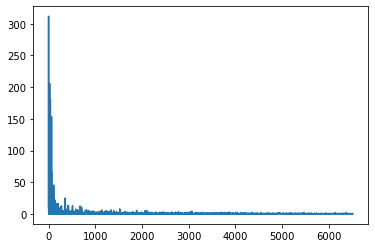

In [18]:
plt.plot(final_scores)

In [19]:
min(final_scores)

0.0

In [20]:
max(final_scores)

311.924072265625

In [21]:
np.mean(final_scores)

0.7535676568402117

In [22]:
np.median(final_scores)

0.00407606060616672

In [23]:
media = np.mean(final_scores)
mediana = np.median(final_scores)

In [24]:
tokens_to_plot = []

In [25]:
# For median score
for token, score in final_d.items():
    if score >= mediana:
        tokens_to_plot.append(token)

In [26]:
# For mean score
for token, score in final_d.items():
    if score >= media:
        tokens_to_plot.append(token)

In [27]:
len(tokens_to_plot)

4566

### Generate wordcloud

(-0.5, 399.5, 199.5, -0.5)

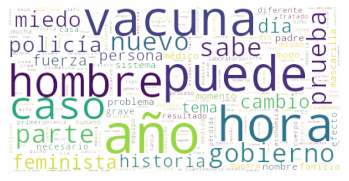

In [39]:
plt.figure()
t = ' '.join(token for token in tokens_to_plot)
wordcloud = WordCloud(background_color="rgba(255, 221, 204, 1)", mode='RGBA', stopwords=stop_words).generate(t)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
# plt.savefig('/home/alberto/Escritorio/TFM/code/wordcloud_attentionmodel_no_transparent.png', transparent=False)

In [29]:
plt.savefig('wordcloud_attentionmodel.png')

<Figure size 432x288 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

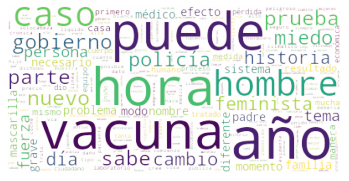

In [38]:
# my_dpi = 1
# plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
plt.figure()
t = ' '.join(token for token in tokens_to_plot)
wordcloud = WordCloud(max_words=1000, random_state=42, background_color="rgba(255, 221, 204, 1)", mode='RGBA', stopwords=stop_words).generate(t)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
# plt.savefig('/home/alberto/Escritorio/TFM/code/wordcloud_attentionmodel_no_transparent.png', transparent=False, dpi=1, format='png')

In [31]:
from PIL import Image
mydpi = 300
mask = np.array(Image.open('/home/alberto/Escritorio/propagandaimg4.jpg'))
t = ' '.join(token for token in tokens_to_plot)
wc = WordCloud(max_words=10000, mask=mask, width=mask.shape[1], # width=720,
               height=mask.shape[0], # height=1080,  # height=mask.shape[0]*5, 
               random_state=42, background_color="rgba(255, 221, 204, 1)", 
               mode='RGBA').generate(t)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.savefig('/home/alberto/Escritorio/TFM/code/wordcloud_attentionmodel_no_transparent.png', transparent=False, format='png')

FileNotFoundError: [Errno 2] No such file or directory: '/home/alberto/Escritorio/propagandaimg4.jpg'

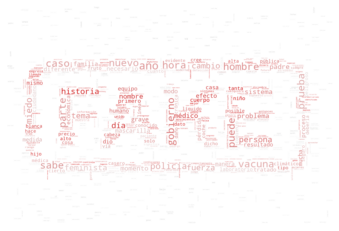

In [43]:
mydpi = 300
mask = np.array(Image.open('/home/alberto/Escritorio/FakeDesCopetition2021/imgsforwc/fakeimg1.jpg'))
mask_colors = ImageColorGenerator(mask)
t = ' '.join(token for token in tokens_to_plot)
wc = WordCloud(max_words=50000, mask=mask, width=720, # width=mask.shape[1]*5,
               height=1080,  # height=mask.shape[0]*5, 
               random_state=42, background_color="white",
               stopwords=stop_words,
               color_func=mask_colors).generate(t)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.savefig('/home/alberto/Escritorio/FakeDesCopetition2021/wordclouds/wordcloud_attentionmodel_no_transparent.png', dpi=mydpi, transparent=False, format='png')

In [32]:
from wordcloud import ImageColorGenerator, STOPWORDS

In [33]:
weights = [(token, score) for token, score in final_d.items()]

In [34]:
weights

[('mujeres', 10.188934326171877),
 ('de', 311.924072265625),
 ('están', 8.81309700012207),
 ('mostrando', 0.3781250715255737),
 ('efectos', 0.7842435836791992),
 ('secundarios', 0.451372504234314),
 ('típicos', 0.14093540608882904),
 ('cancer', 0.0724102035164833),
 ('mama', 0.03696601837873459),
 ('los', 73.63067626953125),
 ('médicos', 2.3792073726654053),
 ('usa', 0.39897221326828),
 ('anuncian', 0.005125603638589382),
 ('nuevas', 0.5674254894256592),
 ('pautas', 0.0023551308549940586),
 ('para', 46.20090866088867),
 ('las', 73.41498565673828),
 ('contra', 4.163496494293213),
 ('recientemente', 0.00027996193966828287),
 ('han', 10.510445594787598),
 ('observado', 6.527397636091337e-05),
 ('inflamación', 4.52055137429852e-05),
 ('en', 126.74232482910156),
 ('detección', 0.9210205674171448),
 ('que', 205.77505493164062),
 ('se', 61.95989608764648),
 ('siempre', 6.267860412597656),
 ('vemos', 0.2866417467594147),
 ('una', 45.16081619262695),
 ('normal', 2.52108770837367e-06),
 ('llamam

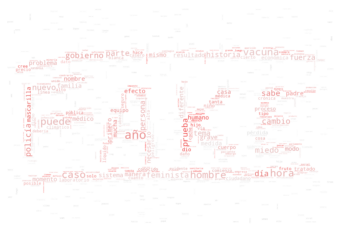

In [48]:
mydpi = 300
mask = np.array(Image.open('/home/alberto/Escritorio/FakeDesCopetition2021/imgsforwc/fakeimg2.jpg'))
mask_colors = ImageColorGenerator(mask)
t = ' '.join(token for token in tokens_to_plot)
wc = WordCloud(max_words=15000, mask=mask, width=720, # width=mask.shape[1]*5,
               height=1080,  # height=mask.shape[0]*5, 
               random_state=42, background_color="white", stopwords=stop_words,
               color_func=mask_colors).generate(t)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.savefig('/home/alberto/Escritorio/FakeDesCopetition2021/wordclouds/wordcloud_attentionmodel_no_transparent_1.png', dpi=mydpi, transparent=False, format='png')

In [168]:
new_final_d = {}
for token, score in final_d.items():
    if token not in stop_words:
        new_final_d[str(token)] = score

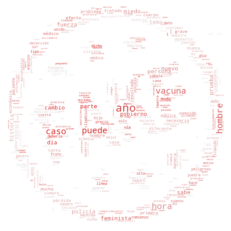

In [51]:
mydpi = 300
mask = np.array(Image.open('/home/alberto/Escritorio/FakeDesCopetition2021/imgsforwc/fakeimg3.jpg'))
mask_colors = ImageColorGenerator(mask, default_color='blue')
t = ' '.join(token for token in tokens_to_plot)
wc = WordCloud(max_words=15000, mask=mask, width=720, # width=mask.shape[1]*5,
               height=1080,  # height=mask.shape[0]*5, 
               random_state=42, background_color="white", stopwords=stop_words,
               color_func=mask_colors).generate(t)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.savefig('/home/alberto/Escritorio/FakeDesCopetition2021/wordclouds/wordcloud_attentionmodel_no_transparent_2.png', dpi=mydpi, transparent=False, format='png')

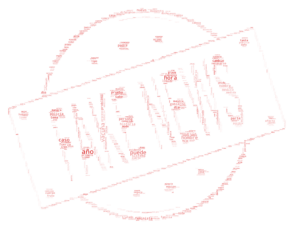

In [53]:
mydpi = 300
mask = np.array(Image.open('/home/alberto/Escritorio/FakeDesCopetition2021/imgsforwc/fakeimg4.png'))
mask_colors = ImageColorGenerator(mask)
t = ' '.join(token for token in tokens_to_plot)
wc = WordCloud(max_words=15000, mask=mask, width=720, # width=mask.shape[1]*5,
               height=1080,  # height=mask.shape[0]*5, 
               random_state=42, background_color="white", stopwords=stop_words,
               color_func=mask_colors).generate(t)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.savefig('/home/alberto/Escritorio/FakeDesCopetition2021/wordclouds/wordcloud_attentionmodel_no_transparent_3.png', dpi=mydpi, transparent=False, format='png')

In [ ]:
# For no propaganda img
mydpi = 300
mask = np.array(Image.open('/home/alberto/Escritorio/propagandaimg6.jpg'))
mask_colors = ImageColorGenerator(mask)
wc = WordCloud(max_words=1000, mask=mask, width=720, # width=mask.shape[1]*5,
               height=1080,  # height=mask.shape[0]*5, 
               random_state=42, background_color="white", stopwords=STOPWORDS, color_func=mask_colors).generate_from_frequencies(new_final_d)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.savefig('/home/alberto/Escritorio/TFM/code/wordcloud_attentionmodel_exp2_propaganda_transparent.png', dpi=mydpi, transparent=True, format='png')

In [199]:
# EXP1 Propaganda
propaganda_exp1 = pd.read_csv('res_attention_propaganda_exp1.csv')
tokens_propa_exp1 = propaganda_exp1['tokens']
scores_propa_exp1 = propaganda_exp1['att_score']
final_scores_propa_exp1 = []
for i in range(len(scores_propa_exp1)):
    aux = scores_propa_exp1[i]
    aux = aux[1:-1]
    aux = aux.replace('\n', '')
    aux = re.sub('(\s){2,}',' ', aux)
    if aux[0] == ' ' or aux[0] == '':
        li = list(aux[1:-1].split(' '))
    else:
        li = list(aux[0:-1].split(' '))
    li = [float(ele) for ele in li]
    n = len(li)
    li_mean = sum(li)/n
    final_scores_propa_exp1.append(li_mean)
final_d_propa_exp1 = {}
for token, score in zip(tokens_propa_exp1, final_scores_propa_exp1):
    final_d_propa_exp1[token] = score
media_propa_exp1 = np.mean(final_scores_propa_exp1)
mediana__propa_exc1 = np.median(final_scores_propa_exp1)
new_final_d_propa_exp1 = {}
for token, score in final_d_propa_exp1.items():
    if token not in stop_words:
        new_final_d_propa_exp1[str(token)] = score

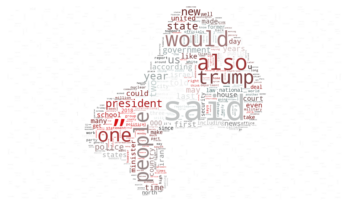

In [197]:
# For propaganda img
mydpi = 300
mask = np.array(Image.open('/home/alberto/Escritorio/propagandaimg7.jpg'))
mask_colors = ImageColorGenerator(mask, default_color=blue)
wc = WordCloud(max_words=10000, mask=mask, width=720, # width=mask.shape[1]*5,
               height=1080,  # height=mask.shape[0]*5, 
               random_state=42, background_color="white", stopwords=STOPWORDS, color_func=mask_colors).generate_from_frequencies(new_final_d_propa_exp1)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.savefig('/home/alberto/Escritorio/TFM/code/wordcloud_attentionmodel_exp1_propaganda_transparent.png', dpi=mydpi, transparent=True, format='png')

In [74]:
from math import isnan

In [75]:
# EXP1 No Propaganda
true_dict = pd.read_csv('res_true_attention.csv')
tokens_no_propa_exp1 = true_dict['tokens']
scores_no_propa_exp1 = true_dict['att_score']

final_d_no_propa_exp1 = {}
for token, score in zip(tokens_no_propa_exp1, scores_no_propa_exp1):
    final_d_no_propa_exp1[token] = score
media_no_propa_exp1 = np.mean(final_scores_no_propa_exp1)
mediana__no_propa_exc1 = np.median(final_scores_no_propa_exp1)
new_final_d_no_propa_exp1 = {}
for token, score in final_d_no_propa_exp1.items():
    if token not in stop_words and not isnan(score):
        new_final_d_no_propa_exp1[str(token)] = score

/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:3256: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib/python3/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [80]:
len(new_final_d_no_propa_exp1)

10770

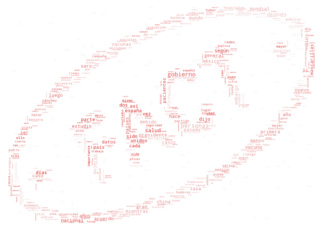

In [90]:
mydpi = 300
mask = np.array(Image.open('/home/alberto/Escritorio/FakeDesCopetition2021/imgsforwc/trueimg1.png'))
mask_colors = ImageColorGenerator(mask)
wc = WordCloud(max_words=1000, mask=mask, width=720, # width=mask.shape[1]*5,
               height=1080,  # height=mask.shape[0]*5, 
               random_state=42, background_color="white", stopwords=stop_words,
               color_func=mask_colors).generate_from_frequencies(new_final_d_no_propa_exp1)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.savefig('/home/alberto/Escritorio/FakeDesCopetition2021/wordclouds/wordcloud_attentionmodel_no_transparent_true_1.png', dpi=mydpi, transparent=True, format='png')

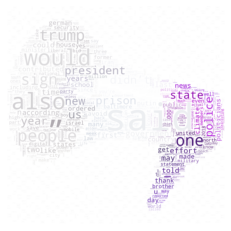

In [195]:
# For no propaganda img
mydpi = 300
mask = np.array(Image.open('/home/alberto/Escritorio/propagandaimg6.jpg'))
mask_colors = ImageColorGenerator(mask)
wc = WordCloud(max_words=10000, mask=mask, width=720, # width=mask.shape[1]*5,
               height=1080,  # height=mask.shape[0]*5, 
               random_state=42, background_color="white", stopwords=STOPWORDS, color_func=mask_colors).generate_from_frequencies(new_final_d_no_propa_exp1)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.savefig('/home/alberto/Escritorio/TFM/code/wordcloud_attentionmodel_exp1_no_propaganda_transparent.png', dpi=mydpi, transparent=True, format='png')